# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

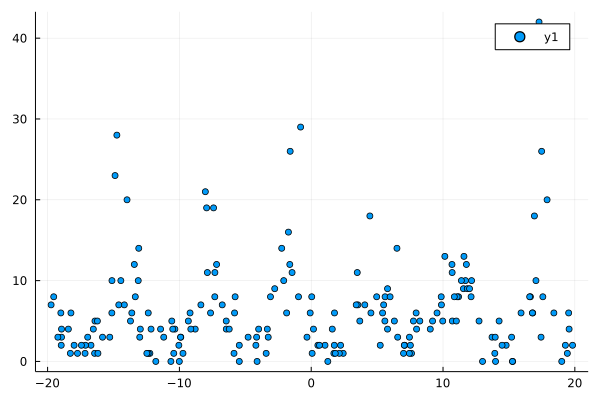

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -565.8493305931557
[ Info: Training ended after 20 iterations. Total number of iterations 20
  3.537592 seconds (7.09 M allocations: 457.788 MiB, 3.84% gc time, 97.02% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.36687572152270753, 0.18302061458102592, 0.356975106242121, 0.5167206989761268, 0.45638675633666564, 0.35920092028330275, 0.4668565521928637, 0.3678935869182114, 0.6041736190605682, 0.4979922357523083  …  0.2140370256820216, 0.5581980228732701, 0.1940313147550469, 0.3559087066416867, 0.1937930995771207, 0.395130818853221, 0.45592199374892756, 0.24694280741137378, 0.3685159927555323, 0.3363942675296232], θ = [2.966797379685395, 5.4846986688394965, 5.442328820777117, 7.337463186671306, 5.40648166818438, 6.925693831529621, 4.420009834576437, 4.449923026975047, 6.309238002886102, 12.247920199708616  …  7.471498159853618, 6.3363228245231085, 6.479683735039142, 8.411396878700328, 4.984410310055787, 4.442351749205073, 3.4406070145731484, 4.477270812932824, 4.94417301522121, 5.448714765640381]), opt_state = (NamedTuple(),), hyperopt_state = (NamedTuple(),

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -698.2689033914393
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.390676 seconds (4.68 M allocations: 333.990 MiB, 95.78% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 13.608208277875587) infered by Analytic Variational Inference , (local_vars = (c = [0.5676075804212989, 0.22238703728876782, 0.2749860938450113, 0.4934176077784386, 0.6539971563447495, 0.282209759852805, 0.6621049504369765, 0.5534419080186499, 0.6110662619047987, 0.471327242203804  …  0.13828755388376285, 0.5399643577836416, 0.3048755626464577, 0.2747875360488132, 0.22943303904052365, 0.5995105798747763, 0.6472855354241376, 0.405647758257224, 0.5596006313674314, 0.25182263935749244], θ = [4.6612604956948465, 6.6159495961573835, 5.968967759081612, 7.448112427947215, 7.180385283348286, 7.4168463654606, 6.2172160971085635, 6.094833500065238, 6.21953144827016, 12.429617880555297  …  8.361722868657854, 6.383795572231784, 7.7637010080046345, 8.92398635573792, 6.1123469509888855, 6.151865781330578, 5.213835601669875, 5.928983603547136, 6.604047635950449, 6.0611290350447415], γ = [8.571480117237101, 7.286387356378639, 6.0130671375234

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

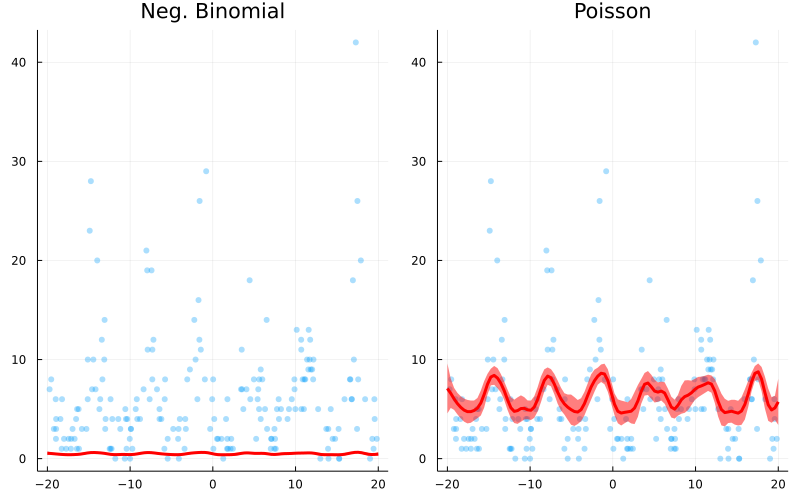

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*